## Nihar Muniraju

### Assignment 4

### Item-Based Joke Recommendation [Dataset: jokes.zip]
For this problem you will use a modified version of the item-based recommender algorithm from Ch. 14 of Machine Learning in Action and use it on joke ratings data based on Jester Online Joke Recommender System. The modified version of the code is provided in the module itemBasedRec.py. Most of the module will be used as is, but you will add some additional functionality.

The data set contains two files. The file "modified_jester_data.csv" contains the ratings on 100 jokes by 1000 users (each row is a user profile). The ratings have been normalized to be between 1 and 21 (a 20-point scale), with 1 being the lowest rating. A zero indicated a missing rating. The file "jokes.csv" contains the joke ids mapped to the actual text of the jokes.

Your tasks in this problem are the following (please also see comments for the function stubs in the provided module):

### PART A: [15 pts] Load in the joke ratings data and the joke text data into appropriate data structures. Use the "recommend" function to provide top 5 joke recommendations for users with id 4 using both Pearson and cosine similarity measures. Note the differences. Use the standard item-based collaborative filtering (based on the rating prediction function "standEst"). Next, find the top 5 recommendations for user with id 25 only with Pearson similarity using both the standard estimator and the SVD-based version (using "svdEst" as the prediction engine) to generate these recommendations. Note the differences. When outputting recommendations, you should show both the id and the text of the recommended jokes (in decreasing order of predicted rating) as well as the predicted ratings for each.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
from numpy import *
from numpy import mat, shape, nonzero, logical_and, corrcoef, eye

In [2]:
# Loading joke ratings data
joke_ratings_df = pd.read_csv('N:/Programming machine learning/assignment 4/jokes (1)/modified_jester_data.csv', header=None)
joke_ratings_matrix = joke_ratings_df.to_numpy()

# Loading joke text data
joke_texts_df = pd.read_csv('N:/Programming machine learning/assignment 4/jokes (1)/jokes.csv', header=None, usecols=[1])
joke_texts_list = joke_texts_df[1].tolist()


In [3]:
joke_ratings_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.18,19.79,1.34,2.84,3.48,2.50,1.15,15.17,2.02,6.24,...,13.82,0.00,0.00,0.00,0.00,0.00,5.37,0.00,0.00,0.00
1,15.08,10.71,17.36,15.37,8.62,1.34,10.27,5.66,19.88,20.22,...,13.82,6.05,10.71,18.86,10.81,8.86,14.06,11.34,6.68,12.07
2,0.00,0.00,0.00,0.00,20.03,20.27,20.03,20.27,0.00,0.00,...,0.00,0.00,0.00,20.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,19.35,0.00,0.00,12.80,19.16,8.18,17.21,0.00,12.84,...,0.00,0.00,0.00,11.53,0.00,0.00,0.00,0.00,0.00,0.00
4,19.50,15.61,6.83,5.61,12.36,12.60,18.04,15.61,10.56,16.73,...,16.19,16.58,15.27,16.19,16.73,12.55,14.11,17.55,12.80,12.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.94,5.47,16.19,5.51,6.92,8.48,14.20,14.83,4.98,13.96,...,6.58,9.93,15.37,7.89,13.72,6.87,13.23,5.47,14.54,13.38
996,15.27,11.39,16.39,5.37,7.41,16.58,12.17,2.84,5.13,4.30,...,0.00,0.00,0.00,0.00,6.58,0.00,0.00,0.00,0.00,0.00
997,16.58,16.63,15.85,7.89,14.40,9.74,14.54,13.14,6.34,11.78,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
998,3.67,4.45,3.67,3.67,9.40,7.65,3.86,4.40,3.67,4.93,...,3.82,6.87,6.87,3.77,3.77,3.77,3.77,3.77,3.77,3.28


In [4]:
joke_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  

In [5]:
joke_ratings_df.shape

(1000, 100)

In [6]:
joke_texts_df.head()

,1
0,"A man visits the doctor. The doctor says ""I ha..."
1,This couple had an excellent relationship goin...
2,Q. What's 200 feet long and has 4 teeth? A. Th...
3,Q. What's the difference between a man and a t...
4,Q. What's O. J. Simpson's Internet address? A....


In [7]:
joke_texts_df.shape

(100, 1)

In [8]:
def euclidean_similarity(vectorA, vectorB):
    return 1.0 / (1.0 + la.norm(vectorA - vectorB))

In [9]:
def pearson_similarity(vectorA, vectorB):
    if len(vectorA) < 3:
        return 1.0
    return 0.5 + 0.5 * corrcoef(vectorA, vectorB, rowvar=0)[0][1]

In [10]:
def cosine_similarity(vectorA, vectorB):
    numerator = (vectorA.T * vectorB).item()  # Extract the scalar value
    denominator = la.norm(vectorA) * la.norm(vectorB)
    return 0.5 + 0.5 * (numerator / denominator)

In [11]:
def standard_estimate(rating_matrix, user_index, similarity_measure, item_index):
    num_items = shape(rating_matrix)[1]
    total_similarity = 0.0
    weighted_ratings = 0.0
    user_ratings = mat(rating_matrix)
    for j in range(num_items):
        rating_by_user = user_ratings[user_index, j]
        if rating_by_user == 0:
            continue
        overlapping_items = nonzero(logical_and(user_ratings[:, item_index] > 0, user_ratings[:, j] > 0))[0]
        if len(overlapping_items) == 0:
            item_similarity = 0
        else:
            item_similarity = similarity_measure(user_ratings[overlapping_items, item_index], user_ratings[overlapping_items, j])
        total_similarity += item_similarity
        weighted_ratings += item_similarity * rating_by_user
    if total_similarity == 0:
        return 0
    else:
        return weighted_ratings / total_similarity

In [12]:
def svd_estimate(rating_matrix, user_index, similarity_measure, item_index):
    num_items = shape(rating_matrix)[1]
    total_similarity = 0.0
    weighted_ratings = 0.0
    user_ratings = mat(rating_matrix)
    U, Sigma, VT = la.svd(user_ratings)
    Sigma4 = mat(eye(4) * Sigma[:4])
    transformed_items = user_ratings.T * U[:, :4] * Sigma4.I
    for j in range(num_items):
        rating_by_user = user_ratings[user_index, j]
        if rating_by_user == 0 or j == item_index:
            continue
        item_similarity = similarity_measure(transformed_items[item_index, :].T, transformed_items[j, :].T)
        total_similarity += item_similarity
        weighted_ratings += item_similarity * rating_by_user
    if total_similarity == 0:
        return 0
    else:
        return weighted_ratings / total_similarity

In [13]:
def get_recommendations(rating_matrix, user_index, num_recommendations=3, similarity_measure=cosine_similarity, estimate_method=standard_estimate):
    unrated_items = nonzero(rating_matrix[user_index, :].A == 0)[1]
    if len(unrated_items) == 0:
        return 'You have rated everything'
    item_scores = []
    for item in unrated_items:
        estimated_score = estimate_method(rating_matrix, user_index, similarity_measure, item)
        item_scores.append((item, estimated_score))
    return sorted(item_scores, key=lambda x: x[1], reverse=True)[:num_recommendations]

In [14]:
jester_data_matrix = np.matrix(joke_ratings_df)
user_id = 4

In [15]:
cosine_recommendations = get_recommendations(jester_data_matrix, user_id, num_recommendations=5, similarity_measure=cosine_similarity, estimate_method=standard_estimate)
cosine_recommendations

[(71, 14.293754381681563),
 (75, 14.293605672411005),
 (79, 14.293063319114747),
 (78, 14.2908339103558),
 (70, 14.287092374768891)]

In [16]:
pearson_recommendations = get_recommendations(jester_data_matrix, user_id, num_recommendations=5, similarity_measure=pearson_similarity, estimate_method=standard_estimate)
pearson_recommendations

[(71, 14.413443009309447),
 (75, 14.397311198445264),
 (79, 14.382511887413443),
 (78, 14.356160763938075),
 (72, 14.334361485417928)]

In [17]:
def recommend_top_jokes(rating_matrix, joke_texts, user_id, top_N, similarity_method, estimation_method):
    recommendations = get_recommendations(rating_matrix, user_id, num_recommendations=top_N, similarity_measure=similarity_method, estimate_method=estimation_method)
    if recommendations == 'You have rated everything':
        return

    print("Recommendations are:", recommendations)

    print('\n********Top', top_N, 'jokes for user#', user_id, 'are: *************\n')

    for joke_id, predicted_rating in recommendations:
        print("\t JOKE : (", joke_id, ") - ", joke_texts[joke_id], '\n\t RATING (Predicted) = ', predicted_rating, '\n')

    print('\n\n')

recommend_top_jokes(jester_data_matrix, joke_texts_list, 25, 5, pearson_similarity, standard_estimate)

Recommendations are: [(99, 15.324673571007686), (71, 15.324296950553675), (97, 15.322105340570541), (82, 15.301730225022272), (91, 15.294030630051065)]

********Top 5 jokes for user# 25 are: *************

	 JOKE : ( 99 ) -  Q: What's the difference between greeting a Queen and greeting thePresident of the United  States?A: You only have to get on one knee to greet the queen. 
	 RATING (Predicted) =  15.324673571007686 

	 JOKE : ( 71 ) -  On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass ?" 
	 RATING (Predicted) =  15.32429695

In [18]:
# Pearson similarity
recommend_top_jokes(jester_data_matrix, joke_texts_list, 25, 5, pearson_similarity, svd_estimate)

Recommendations are: [(3, 15.277088154749473), (79, 15.238062599769163), (72, 15.209188661833458), (71, 15.18502140590189), (99, 15.180560799732316)]

********Top 5 jokes for user# 25 are: *************

	 JOKE : ( 3 ) -  Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it. 
	 RATING (Predicted) =  15.277088154749473 

	 JOKE : ( 79 ) -  Hillary Bill Clinton and the Pope are sitting together on an airplane. Bill says "I could throw one thousand dollar bill out of this plane and make one person very happy."Hillary says "I could throw 10 hundred dollar bills out of the plane and make 10 people very happy."The Pope chips in and says "I could throw Bill out of the airplane and make the whole country happy." 
	 RATING (Predicted) =  15.238062599769163 

	 JOKE : ( 72 ) -  Q: What is the difference between George  Washington Richard Nixon and Bill Clinton? A: Washington couldn't tell a lie Nixon couldn't   tell the truth andClinton does

### PART B: [15 pts] Complete the definition for the function "test". This function iterates over all users and for each performs evaluation (by calling the provided "cross_validate_user" function) and returns the error information necessary to compute Mean Absolute Error (MAE). Use this function to perform evaluation (with 20% test-ratio for each user) comparing MAE results using the rating prediction function "standEst" with results using the "svdEst" prediction function (in both cases using Pearson similarity measure. Note that this may take several minutes depending on your computational environment. [Note: See comments provided in the module for hints on accomplishing these tasks.]

In [19]:
def cross_validate_user(dataMat, user, test_ratio, simMeas, estMethod):
    # Find the indices of the non-zero ratings for the user
    rated_items = np.nonzero(dataMat[user, :].A > 0)[1]

    # Determine the number of ratings to use for testing based on the test_ratio
    num_test_ratings = int(test_ratio * len(rated_items))

    # Randomly select a subset of indices for testing
    test_indices = np.random.choice(rated_items, size=num_test_ratings, replace=False)

    # Initialize error and num_tests
    error = 0.0
    num_tests = 0

    # Create a copy of the user's ratings to modify for testing
    user_ratings = dataMat[user, :].copy()

    # Loop through the test indices
    for test_index in test_indices:
        # Store the actual rating and set it to 0 in the user's ratings (simulate it being unknown)
        actual_rating = user_ratings[0, test_index]
        user_ratings[0, test_index] = 0

        # Use the estMethod to predict the rating
        predicted_rating = estMethod(dataMat, user, simMeas, test_index)

        # Compare the predicted rating with the actual rating to compute the absolute error
        error += abs(predicted_rating - actual_rating)

        # Increment num_tests
        num_tests += 1

        # Restore the actual rating in the user's ratings
        user_ratings[0, test_index] = actual_rating

    return error, num_tests


In [20]:
def test(dataMat, test_ratio, simMeas, estMethod):
    num_users = np.shape(dataMat)[0]
    MAE_sum = 0.0
    total_tests = 0
    
    for user in range(num_users):
        error, num_tests = cross_validate_user(dataMat, user, test_ratio, simMeas, estMethod)
        MAE_sum += error
        total_tests += num_tests
    
    return MAE_sum / total_tests

In [21]:
MAE_standEst = test(jester_data_matrix, 0.2, pearson_similarity, standard_estimate)
print("MAE using standEst:", MAE_standEst)

MAE using standEst: 3.64380165256727


In [22]:
MAE_svdEst = test(jester_data_matrix, 0.2, pearson_similarity, svd_estimate)
print("MAE using svdEst:", MAE_svdEst)

MAE using svdEst: 3.621745181013241


### PART C: [15 pts] Write a new function "print_most_similar_jokes" which outputs the most similar jokes (based on user ratings) to a specified query joke. You function should take as input the joke ratings data, a query joke id, a parameter k for the number similar jokes, and a similarity metric function. It should output the text of the query joke as well as the texts of the top k most similar jokes in decreasing order of similarity (you should also provide the similarity values). Test your function as follows:

     * Show the top 3 most similar jokes to joke with id 9 using Pearson similarity.
     * Show the top 3 most similar jokes to Joke with id 9 using cosine similarity.

[Note: see comments at the end of the provided module as well as comments for the provided stub function.]

In [23]:
def print_most_similar_jokes(dataMat, jokes, query_joke_id, k, simMeas):

    # Initialize a list to store similarity scores
    similarity_scores = []

    # Loop through all jokes
    for joke_id in range(dataMat.shape[1]):
        if joke_id != query_joke_id:
            # Compute similarity between query joke and current joke
            similarity = simMeas(dataMat[:, query_joke_id], dataMat[:, joke_id])
            similarity_scores.append((joke_id, similarity))

    # Sort the similarity scores in decreasing order
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Output the text of the query joke
    print(f"Query Joke (ID: {query_joke_id}): {jokes[query_joke_id]}")

    # Output the texts of the top k most similar jokes
    print(f"\nTop {k} most similar jokes to Joke ID {query_joke_id}:\n")
    for i in range(k):
        similar_joke_id, similarity = sorted_scores[i]
        print(f"{i + 1}. Joke ID: {similar_joke_id}, Similarity: {similarity:.2f}")
        print(f"{jokes[similar_joke_id]}\n")

In [27]:
joke_texts_df = pd.read_csv('N:/Programming machine learning/assignment 4/jokes (1)/jokes.csv', header=None, usecols=[1])
joke_texts_list = joke_texts_df[1].tolist()

In [30]:
jokes_texts_list = [joke.strip() for joke in open('N:/Programming machine learning/assignment 4/jokes (1)/jokes.csv', 'r').readlines()]

### Show the top 3 most similar jokes to joke with id 9 using Pearson similarity.

In [31]:
# Show the top 3 most similar jokes to joke with id 9 using Pearson similarity
print_most_similar_jokes(jester_data_matrix, jokes_list, 9, 3, pearson_similarity)

Query Joke (ID: 9): Two cannibals are eating a clown one turns to other and says: "Does this taste funny to you? 

Top 3 most similar jokes to Joke ID 9:

1. Joke ID: 21, Similarity: 0.76
A duck walks into a pharmacy and asks for a condom. The pharmacist says"Would you like me to stick that on your bill?"The duck says: "What kind of duck do you think I am!"

2. Joke ID: 10, Similarity: 0.76
Q. What do a hurricane a tornado and a redneck divorce all have in common? A. Someone's going to lose their trailer...

3. Joke ID: 54, Similarity: 0.75
A woman has twins and gives them up for adoption.  One of them goes to a family in Egypt and is named "Amal."  The other goes to a  family in Spain; they name him "Juan."  Years later Juan sends a picture of himself to his mom.  Upon receiving the picture she tells her husband that she wishes she also had a picture of Amal.  Her husband responds "But they are twins-if you've seen Juan you've seen   Amal.



### Show the top 3 most similar jokes to Joke with id 9 using cosine similarity.

In [32]:
# Show the top 3 most similar jokes to joke with id 9 using cosine similarity
print_most_similar_jokes(jester_data_matrix, jokes_list, 9, 3, cosine_similarity)

Query Joke (ID: 9): Two cannibals are eating a clown one turns to other and says: "Does this taste funny to you? 

Top 3 most similar jokes to Joke ID 9:

1. Joke ID: 10, Similarity: 0.93
Q. What do a hurricane a tornado and a redneck divorce all have in common? A. Someone's going to lose their trailer...

2. Joke ID: 37, Similarity: 0.93
May I take your order? the waiter asked. "Yes how do you prepare your chickens?" "Nothing special sir" he replied. "We just tell them straight out that they're going to die."

3. Joke ID: 21, Similarity: 0.93
A duck walks into a pharmacy and asks for a condom. The pharmacist says"Would you like me to stick that on your bill?"The duck says: "What kind of duck do you think I am!"



### PART D: [15 pts] The implementation of item-based collaborative filtering provided in the module is not scalable since for each prediction it attempts to compute pairwise similarities among all items. Develop your own item-based collaborative filtering recommender that uses a model-based approach (separating the training and the prediction tasks). In the training component, item-item similarities for all pairs of items are computed and stored in an appropriate data structure such as a pairwise similarity matrix. Your training function should be able to use different similarity functions (passed as a parameter) including cosine Similarity or Pearson correlation. The prediction (or estimation) function should take as parameters a target user, an item, a value of k, and the similarities matrix computed in the training phase. It should then return the predicted rating on the target item for the target user. The predicted rating should be the weighted average of the target user's ratings on the k most similar items to the target item (obtained from the similarity matrix). Demonstrate that your function works by computing predicted ratings for users 4 and 25, using k = 10, on top two items recommended to each user on part a (using both Pearson and cosine similarities).

In [33]:
def train_item_based_CF(dataMat, simMeas):
    num_items = dataMat.shape[1]
    simMatrix = np.zeros((num_items, num_items))
    for i in range(num_items):
        for j in range(i, num_items):
            if i != j:
                similarity = simMeas(dataMat[:, i], dataMat[:, j])
                simMatrix[i, j] = similarity
                simMatrix[j, i] = similarity
    return simMatrix

In [34]:
def predict_rating(dataMat, user, item, k, simMatrix):
    similar_items = np.argsort(-simMatrix[item, :])[:k]
    weighted_sum = 0
    sim_sum = 0
    for similar_item in similar_items:
        rating = dataMat[user, similar_item]
        if rating > 0:  # Consider only items rated by the user
            weighted_sum += rating * simMatrix[item, similar_item]
            sim_sum += abs(simMatrix[item, similar_item])
    if sim_sum == 0:
        return 0
    else:
        return weighted_sum / sim_sum

In [35]:
simMatrix_pearson = train_item_based_CF(jester_data_matrix, pearson_similarity)
simMatrix_cosine = train_item_based_CF(jester_data_matrix, cosine_similarity)

In [36]:
user = 4
item = 71
k = 10

original_rating = jester_data_matrix[user, item]
cosine_pred_rating = predict_rating(jester_data_matrix, user, item, k, simMatrix_cosine)
pearson_pred_rating = predict_rating(jester_data_matrix, user, item, k, simMatrix_pearson)

print(f"Predicted rating for user: {user} for item: {item}")
print(f"Original rating: {original_rating}")
print(f"Predicted rating using cosine similarity: {cosine_pred_rating:.3f}")
print(f"Predicted rating using pearson similarity: {pearson_pred_rating:.3f}")

Predicted rating for user: 4 for item: 71
Original rating: 0.0
Predicted rating using cosine similarity: 14.768
Predicted rating using pearson similarity: 14.768


In [37]:
user = 4
item = 25
k = 10

original_rating = jester_data_matrix[user, item]
cosine_pred_rating = predict_rating(jester_data_matrix, user, item, k, simMatrix_cosine)
pearson_pred_rating = predict_rating(jester_data_matrix, user, item, k, simMatrix_pearson)

print(f"Predicted rating for user: {user} for item: {item}")
print(f"Original rating: {original_rating}")
print(f"Predicted rating using cosine similarity: {cosine_pred_rating:.3f}")
print(f"Predicted rating using pearson similarity: {pearson_pred_rating:.3f}")

Predicted rating for user: 4 for item: 25
Original rating: 12.89
Predicted rating using cosine similarity: 15.848
Predicted rating using pearson similarity: 16.428


In [38]:
user = 5
item = 14
k = 10

original_rating = jester_data_matrix[user, item]
cosine_pred_rating = predict_rating(jester_data_matrix, user, item, k, simMatrix_cosine)
pearson_pred_rating = predict_rating(jester_data_matrix, user, item, k, simMatrix_pearson)

print(f"Predicted rating for user: {user} for item: {item}")
print(f"Original rating: {original_rating}")
print(f"Predicted rating using cosine similarity: {cosine_pred_rating:.3f}")
print(f"Predicted rating using pearson similarity: {pearson_pred_rating:.3f}")

Predicted rating for user: 5 for item: 14
Original rating: 11.49
Predicted rating using cosine similarity: 7.645
Predicted rating using pearson similarity: 5.157


### [Extra Credit - 10 pts] Modify the "cross_validate_user" and  "test" functions as necessary to use the new version of the prediction function (from part d). First test the prediction accuracy of your prediction function (similarly to part b, above) using both cosine and Pearson similarity measures. Next, provide a plot of cross-validation accuracies across a range of values of k. (running the "test" function for each value of k). Your plot may look similar to this example. Next, Modify the "recommend" function to use your new prediction function. Using the best observed value of k from your plot demonstrate the functionality of your recommender by generating top 3 recommendations for users 4 and 25.

In [39]:
def cross_validate_user(dataMat, user, test_ratio, simMatrix, k, estMethod):
    rated_items = np.nonzero(dataMat[user, :].A > 0)[1]
    num_test_ratings = int(test_ratio * len(rated_items))
    test_indices = np.random.choice(rated_items, size=num_test_ratings, replace=False)
    error = 0.0
    num_tests = 0
    for test_index in test_indices:
        actual_rating = dataMat[user, test_index]
        dataMat[user, test_index] = 0  # Temporarily remove the rating
        predicted_rating = estMethod(dataMat, user, test_index, k, simMatrix)
        dataMat[user, test_index] = actual_rating  # Restore the rating
        error += abs(predicted_rating - actual_rating)
        num_tests += 1
    return error, num_tests

In [40]:
def test(dataMat, test_ratio, simMatrix, k, estMethod):
    num_users = np.shape(dataMat)[0]
    MAE_sum = 0.0
    total_tests = 0
    for user in range(num_users):
        error, num_tests = cross_validate_user(dataMat, user, test_ratio, simMatrix, k, estMethod)
        MAE_sum += error
        total_tests += num_tests
    return MAE_sum / total_tests

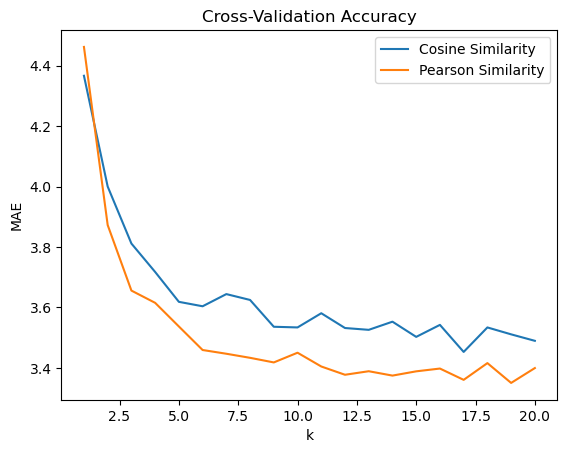

In [43]:
k_values = range(1, 21)
MAE_cosine = []
MAE_pearson = []

for k in k_values:
    MAE_cosine.append(test(jester_data_matrix, 0.2, simMatrix_cosine, k, predict_rating))
    MAE_pearson.append(test(jester_data_matrix, 0.2, simMatrix_pearson, k, predict_rating))

plt.plot(k_values, MAE_cosine, label='Cosine Similarity')
plt.plot(k_values, MAE_pearson, label='Pearson Similarity')
plt.xlabel('k')
plt.ylabel('MAE')
plt.legend()
plt.title('Cross-Validation Accuracy')
plt.show()

In [44]:
def recommend(dataMat, user, N, simMatrix, k, estMethod):
    unrated_items = np.nonzero(dataMat[user, :].A == 0)[1]
    if len(unrated_items) == 0:
        return 'You have rated everything'
    item_scores = []
    for item in unrated_items:
        estimated_score = estMethod(dataMat, user, item, k, simMatrix)
        item_scores.append((item, estimated_score))
    return sorted(item_scores, key=lambda jj: jj[1], reverse=True)[:N]

# Example usage with the best observed value of k
best_k = 10  # Replace this with the best observed value of k from your plot
recommendations_user_4 = recommend(jester_data_matrix, 4, 3, simMatrix_pearson, best_k, predict_rating)
recommendations_user_25 = recommend(jester_data_matrix, 25, 3, simMatrix_pearson, best_k, predict_rating)

recommendations_user_4
recommendations_user_25


[(3, 14.730634080795703), (57, 13.896576174302474), (74, 13.820000000000002)]